In [164]:
import json
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [5]:
load_dotenv()

True

In [6]:
# Confirm the availability of your Glassnode API access key by checking its type
API_KEY = os.getenv("GLASSNODE_API_KEY")
if not API_KEY:
    print("Error with the glassnode.com API key. Check the .env file.")
type(API_KEY)

str

In [7]:
# define coin
coin = 'BTC'

In [8]:
# Build the first of three Level-2-Dataframes: Network Health

In [9]:
## Extract active address data

In [10]:
active_address = requests.get('https://api.glassnode.com/v1/metrics/addresses/active_count', params={'a': coin, 'api_key': API_KEY})

In [11]:
active_address_df = pd.read_json(active_address.text, convert_dates=['t'])
active_address_df.set_index('t', inplace=True)
active_address_df=active_address_df.rename(columns={'v':'Active Address'})
active_address_df

,Active Address
t,
2009-01-03,0
2009-01-04,0
2009-01-05,0
2009-01-06,0
2009-01-07,0
...,...
2021-07-06,838259
2021-07-07,812872
2021-07-08,800764


<AxesSubplot:title={'center':'Active Address'}, xlabel='t'>

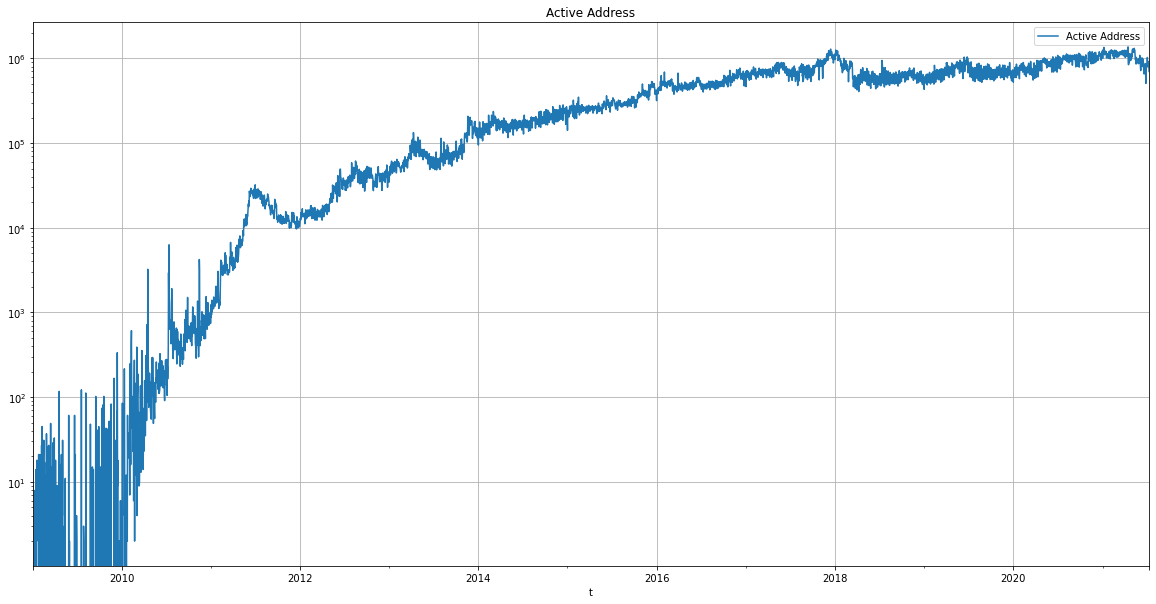

In [12]:
active_address_df.plot(figsize=(20,10), grid=True, logy=True, title='Active Address')

In [13]:
## Extract total transfer volume data

In [14]:
total_transfer_volume = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum', params={'a': coin, 'api_key': API_KEY})

In [15]:
total_transfer_volume_df = pd.read_json(total_transfer_volume.text, convert_dates=['t'])
total_transfer_volume_df.set_index('t', inplace=True)
total_transfer_volume_df = total_transfer_volume_df.rename(columns={'v':'Total Transfer Volume'})
total_transfer_volume_df

,Total Transfer Volume
t,
2009-01-03,0.000000e+00
2009-01-04,0.000000e+00
2009-01-05,0.000000e+00
2009-01-06,0.000000e+00
2009-01-07,0.000000e+00
...,...
2021-07-06,1.332011e+06
2021-07-07,1.324880e+06
2021-07-08,3.250505e+06


<AxesSubplot:title={'center':'Total Transfer Volume'}, xlabel='t'>

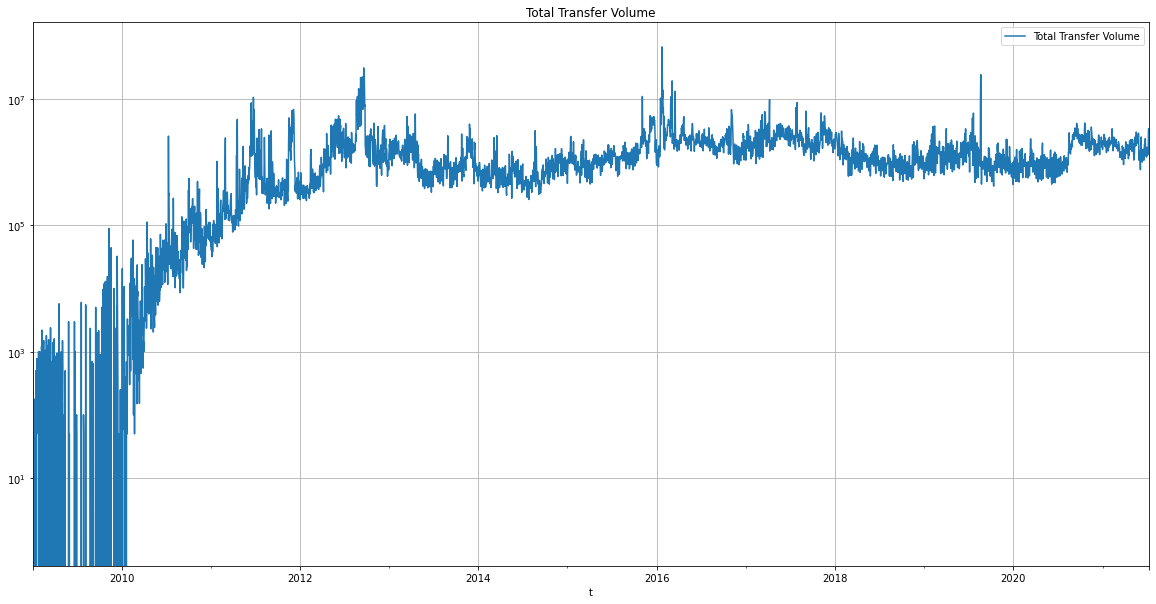

In [16]:
total_transfer_volume_df.plot(figsize=(20,10), grid=True, logy=True, title='Total Transfer Volume')

In [17]:
## Extract velocity data

In [18]:
velocity = requests.get('https://api.glassnode.com/v1/metrics/indicators/velocity', params={'a': coin, 'api_key': API_KEY})

In [19]:
velocity_df = pd.read_json(velocity.text, convert_dates=['t'])
velocity_df.set_index('t', inplace=True)
velocity_df = velocity_df.rename(columns={'v':'Velocity'})
velocity_df

,Velocity
t,
2010-07-18,0.010432
2010-07-19,0.013640
2010-07-20,0.008629
2010-07-21,0.007955
2010-07-22,0.011374
...,...
2021-07-06,0.020433
2021-07-07,0.022266
2021-07-08,0.022810


<AxesSubplot:title={'center':'Velocity'}, xlabel='t'>

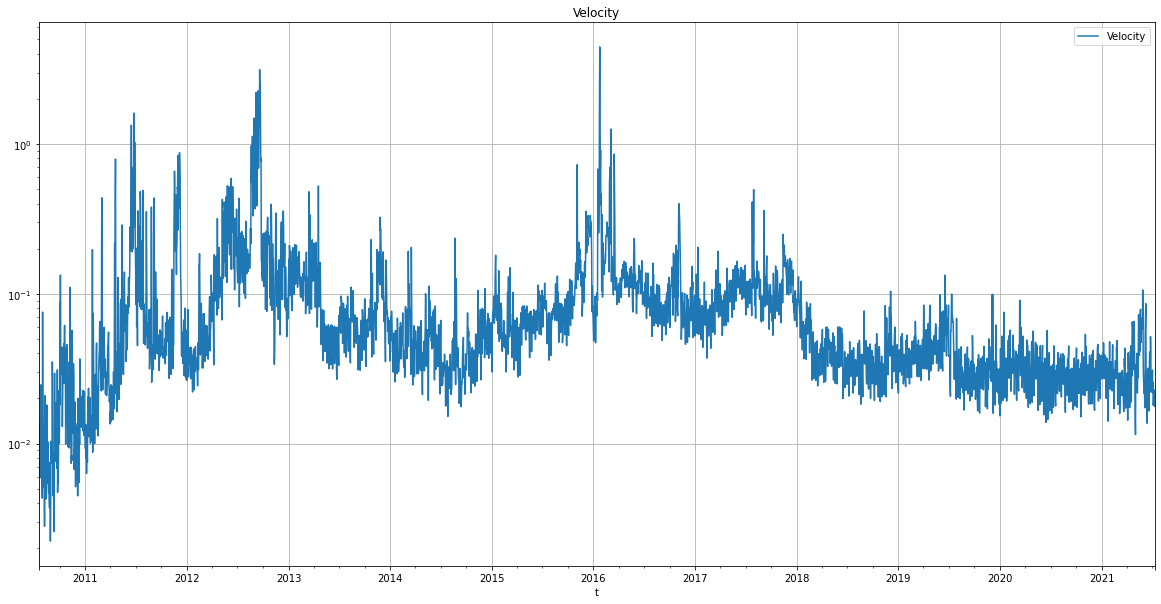

In [20]:
velocity_df.plot(figsize=(20,10), grid=True, logy=True, title='Velocity')

In [21]:
## Extract transaction count data

In [22]:
transaction_count= requests.get('https://api.glassnode.com/v1/metrics/transactions/count', params={'a': coin, 'api_key': API_KEY})

In [23]:
transaction_count_df = pd.read_json(transaction_count.text, convert_dates=['t'])
transaction_count_df.set_index('t', inplace=True)
transaction_count_df = transaction_count_df.rename(columns={'v':'Transaction Count'})
transaction_count_df

,Transaction Count
t,
2009-01-03,0
2009-01-04,0
2009-01-05,0
2009-01-06,0
2009-01-07,0
...,...
2021-07-06,228137
2021-07-07,221104
2021-07-08,230580


<AxesSubplot:title={'center':'Transaction Count'}, xlabel='t'>

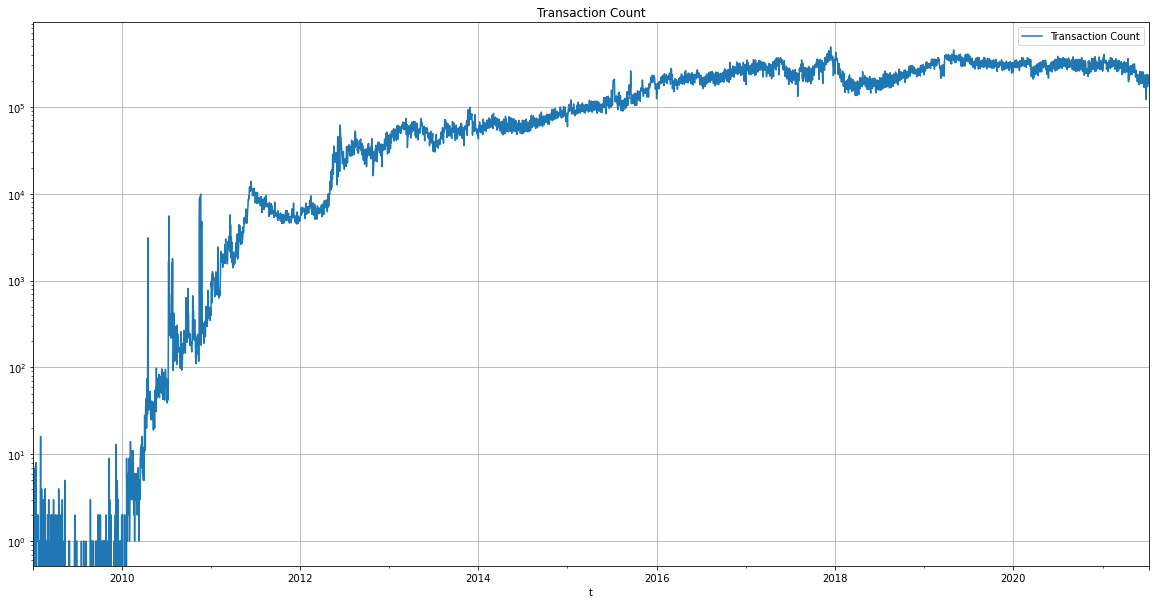

In [24]:
transaction_count_df.plot(figsize=(20,10), grid=True, logy=True, title='Transaction Count')

In [25]:
### Build Level-3-Dataframe: Usage

In [26]:
usage_df_l3 = pd.concat([active_address_df,total_transfer_volume_df,velocity_df,transaction_count_df],axis=1).dropna()
usage_df_l3

,Active Address,Total Transfer Volume,Velocity,Transaction Count
t,,,,
2010-07-18,757,3.606926e+04,0.010432,248
2010-07-19,808,4.714966e+04,0.013640,354
2010-07-20,728,2.990234e+04,0.008629,413
2010-07-21,621,2.765454e+04,0.007955,256
2010-07-22,427,3.963162e+04,0.011374,221
...,...,...,...,...
2021-07-06,838259,1.332011e+06,0.020433,228137
2021-07-07,812872,1.324880e+06,0.022266,221104
2021-07-08,800764,3.250505e+06,0.022810,230580


In [27]:
#### Evaluate correlation among columns

In [28]:
usage_df_l3.corr()

,Active Address,Total Transfer Volume,Velocity,Transaction Count
Active Address,1.000000,0.142633,-0.154971,0.943128
Total Transfer Volume,0.142633,1.000000,0.884312,0.162644
Velocity,-0.154971,0.884312,1.000000,-0.130754
Transaction Count,0.943128,0.162644,-0.130754,1.000000


In [29]:
### Drop Transaction Count due to high correlation with Active Address.

In [30]:
usage_df_l3 = usage_df_l3.drop(columns='Transaction Count')
usage_df_l3

,Active Address,Total Transfer Volume,Velocity
t,,,
2010-07-18,757,3.606926e+04,0.010432
2010-07-19,808,4.714966e+04,0.013640
2010-07-20,728,2.990234e+04,0.008629
2010-07-21,621,2.765454e+04,0.007955
2010-07-22,427,3.963162e+04,0.011374
...,...,...,...
2021-07-06,838259,1.332011e+06,0.020433
2021-07-07,812872,1.324880e+06,0.022266
2021-07-08,800764,3.250505e+06,0.022810


In [31]:
## Extract circulating supply data

In [32]:
circulating_supply= requests.get('https://api.glassnode.com/v1/metrics/supply/current', params={'a': coin, 'api_key': API_KEY})

In [33]:
circulating_supply_df = pd.read_json(circulating_supply.text, convert_dates=['t'])
circulating_supply_df.set_index('t', inplace=True)
circulating_supply_df = circulating_supply_df.rename(columns={'v':'Circulating Supply'})
circulating_supply_df

,Circulating Supply
t,
2009-01-03,50.00
2009-01-04,50.00
2009-01-05,50.00
2009-01-06,50.00
2009-01-07,50.00
...,...
2021-07-06,18749743.75
2021-07-07,18750512.50
2021-07-08,18751381.25


<AxesSubplot:title={'center':'Circulating Supply'}, xlabel='t'>

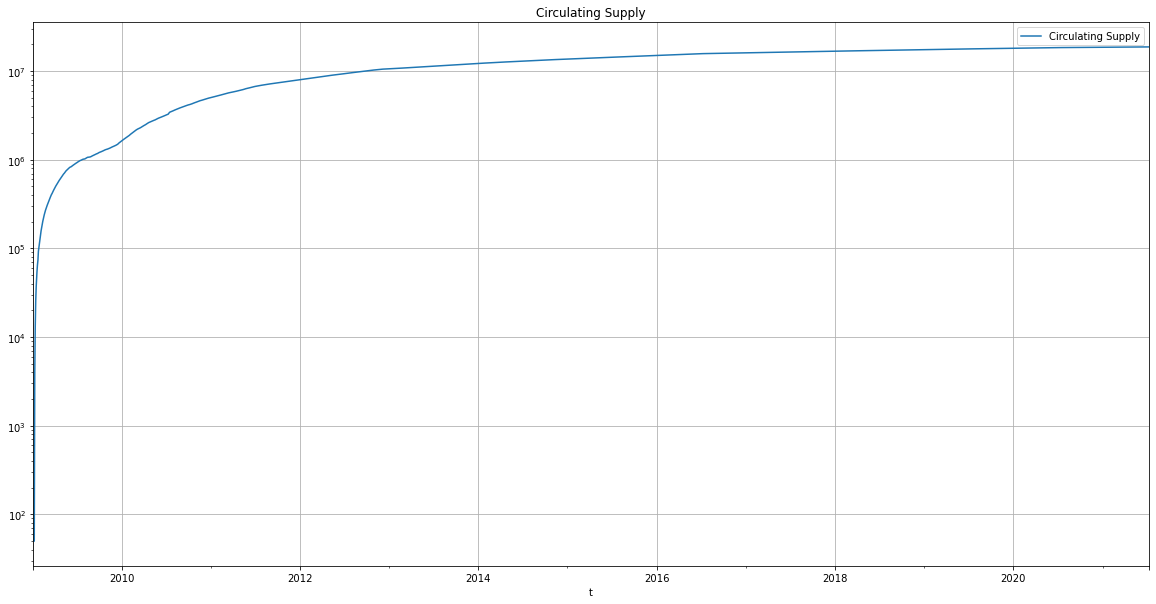

In [34]:
circulating_supply_df.plot(figsize=(20,10), grid=True, logy=True, title='Circulating Supply')

In [35]:
## Extract issuance data

In [36]:
issuance = requests.get('https://api.glassnode.com/v1/metrics/supply/issued', params={'a': coin, 'api_key': API_KEY})

In [37]:
issuance_df = pd.read_json(issuance.text, convert_dates=['t'])
issuance_df.set_index('t', inplace=True)
issuance_df = issuance_df.rename(columns={'v':'Issuance'})
issuance_df

,Issuance
t,
2009-01-03,50.00
2009-01-04,0.00
2009-01-05,0.00
2009-01-06,0.00
2009-01-07,0.00
...,...
2021-07-06,887.50
2021-07-07,768.75
2021-07-08,868.75


<AxesSubplot:title={'center':'Issuance'}, xlabel='t'>

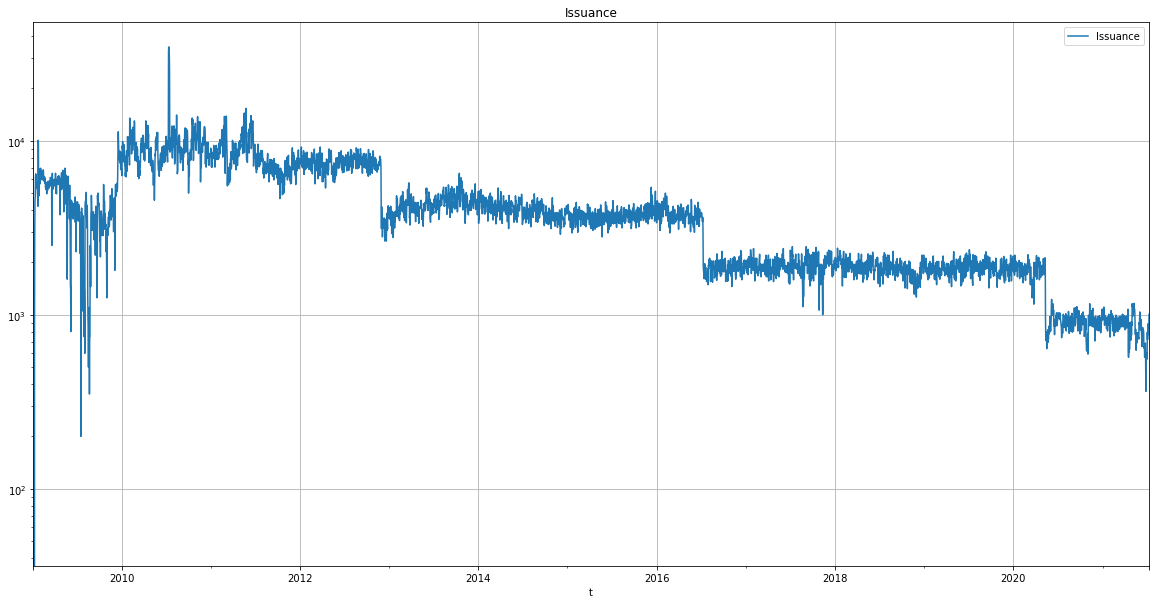

In [38]:
issuance_df.plot(figsize=(20,10), grid=True, logy=True, title='Issuance')

In [39]:
### Build Level-3-Dataframe: monetary_integrity_df_l3

In [40]:
monetary_integrity_df_l3 = pd.concat([circulating_supply_df,issuance_df],axis=1).dropna()
monetary_integrity_df_l3

,Circulating Supply,Issuance
t,,
2009-01-03,50.00,50.00
2009-01-04,50.00,0.00
2009-01-05,50.00,0.00
2009-01-06,50.00,0.00
2009-01-07,50.00,0.00
...,...,...
2021-07-06,18749743.75,887.50
2021-07-07,18750512.50,768.75
2021-07-08,18751381.25,868.75


In [41]:
monetary_integrity_df_l3.corr()

,Circulating Supply,Issuance
Circulating Supply,1.000000,-0.736445
Issuance,-0.736445,1.000000


In [42]:
## Extract hash rate data

In [43]:
#hash_rate = requests.get('https://api.glassnode.com/v1/metrics/mining/hash_rate_mean', params={'a': coin, 'api_key': API_KEY})

In [44]:
# import json
# pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)
# hash_rate_df = json.loads(hash_rate.text)
# hash_rate_df = pd.DataFrame(hash_rate_df)
# hash_rate_df = hash_rate_df.set_index('t')
# hash_rate_df.index = pd.to_datetime(hash_rate_df.index, unit='s')
# hash_rate_df = hash_rate_df.rename(columns={'v':'Hash Rate'})
# hash_rate_df

In [45]:
#hash_rate_df.loc[hash_rate_df['Hash Rate']==hash_rate_df['Hash Rate'].max()]

In [46]:
#type(hash_rate_df.iloc[0,0])

In [47]:
#hash_rate_df = hash_rate_df[:'2021-08-01']

In [48]:
#hash_rate_df.dtypes

# hash_rate_df['Hash Rate'] = hash_rate_df["Hash Rate"].astype('int64')

In [49]:
#hash_rate_df.plot(y='Hash Rate',figsize=(20,10), grid=True, logy=True, title='Hash Rate')

In [50]:
## Extract miner revenue data

In [51]:
#import json
#pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)

In [52]:
## Extract Miner Revenue data

In [53]:
miner_revenue = requests.get('https://api.glassnode.com/v1/metrics/mining/revenue_sum', params={'a': coin, 'api_key': API_KEY})

In [54]:
miner_revenue_df = pd.read_json(miner_revenue.text, convert_dates=['t'])
miner_revenue_df.set_index('t', inplace=True)
miner_revenue_df = miner_revenue_df.rename(columns={'v':'Miner Revenue'})
miner_revenue_df

,Miner Revenue
t,
2009-01-03,50.000000
2009-01-04,0.000000
2009-01-05,0.000000
2009-01-06,0.000000
2009-01-07,0.000000
...,...
2021-07-06,934.574453
2021-07-07,806.598127
2021-07-08,898.027984


<AxesSubplot:title={'center':'Miner Revenue'}, xlabel='t'>

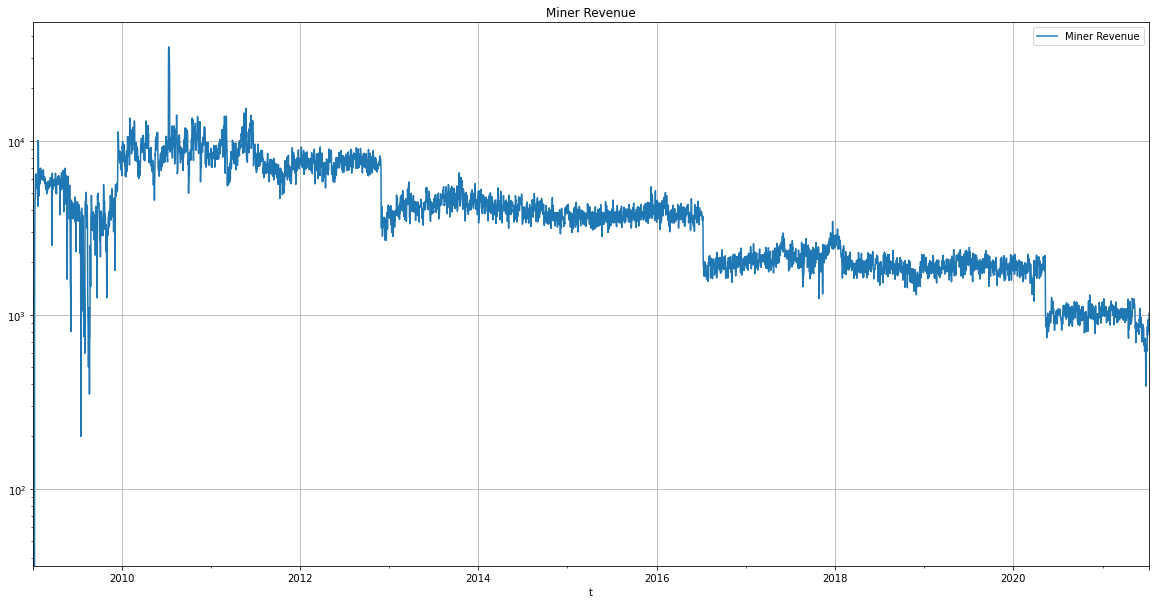

In [55]:
miner_revenue_df.plot(figsize=(20,10), grid=True, logy=True, title='Miner Revenue')

In [56]:
## Extract difficulty data

In [57]:
difficulty = requests.get('https://api.glassnode.com/v1/metrics/indicators/difficulty_ribbon_compression', params={'a': coin, 'api_key': API_KEY})

In [58]:
difficulty_df = pd.read_json(difficulty.text, convert_dates=['t'])
difficulty_df.set_index('t', inplace=True)
difficulty_df = difficulty_df.rename(columns={'v':'Difficulty'})
difficulty_df

,Difficulty
t,
2009-07-28,0.000000
2009-07-29,0.000000
2009-07-30,0.000000
2009-07-31,0.000000
2009-08-01,0.000000
...,...
2021-07-06,0.078526
2021-07-07,0.088585
2021-07-08,0.098761


<AxesSubplot:title={'center':'Difficulty'}, xlabel='t'>

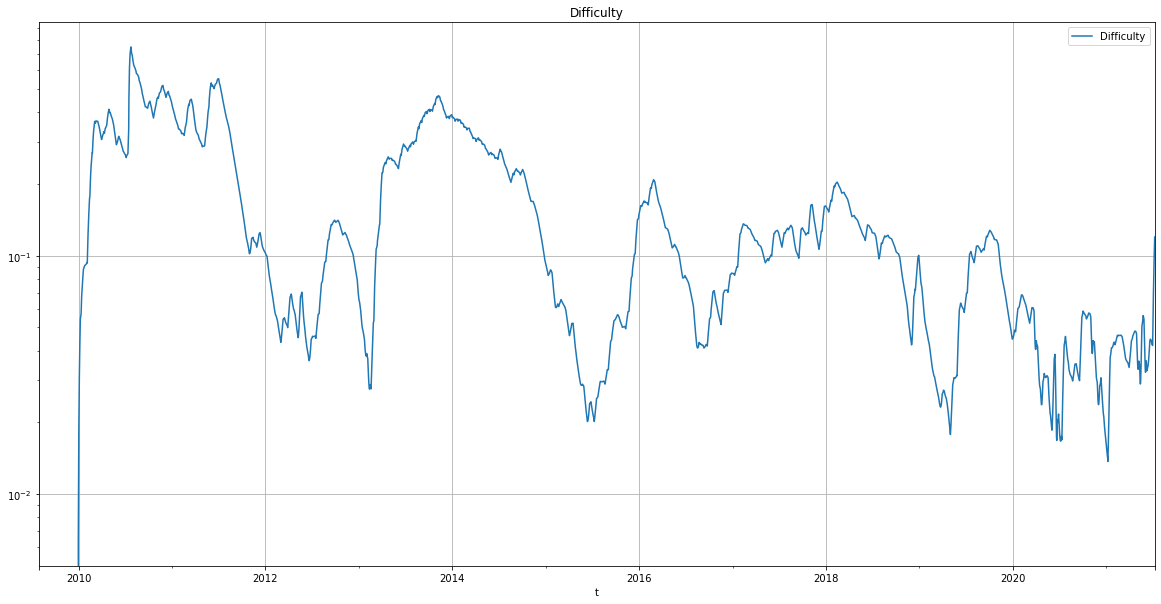

In [59]:
difficulty_df.plot(figsize=(20,10), grid=True, logy=True, title='Difficulty')

In [60]:
## Extract Thrermocap data

In [61]:
thermocap = requests.get('https://api.glassnode.com/v1/metrics/mining/thermocap', params={'a': coin, 'api_key': API_KEY})

In [62]:
thermocap_df = pd.read_json(thermocap.text, convert_dates=['t'])
thermocap_df.set_index('t', inplace=True)
thermocap_df = thermocap_df.rename(columns={'v':'Thermocap'})
thermocap_df

,Thermocap
t,
2010-07-18,1.708201e+05
2010-07-19,1.716100e+05
2010-07-20,1.723301e+05
2010-07-21,1.730580e+05
2010-07-22,1.736565e+05
...,...
2021-07-06,2.727725e+10
2021-07-07,2.730382e+10
2021-07-08,2.733241e+10


<AxesSubplot:title={'center':'Thermocap'}, xlabel='t'>

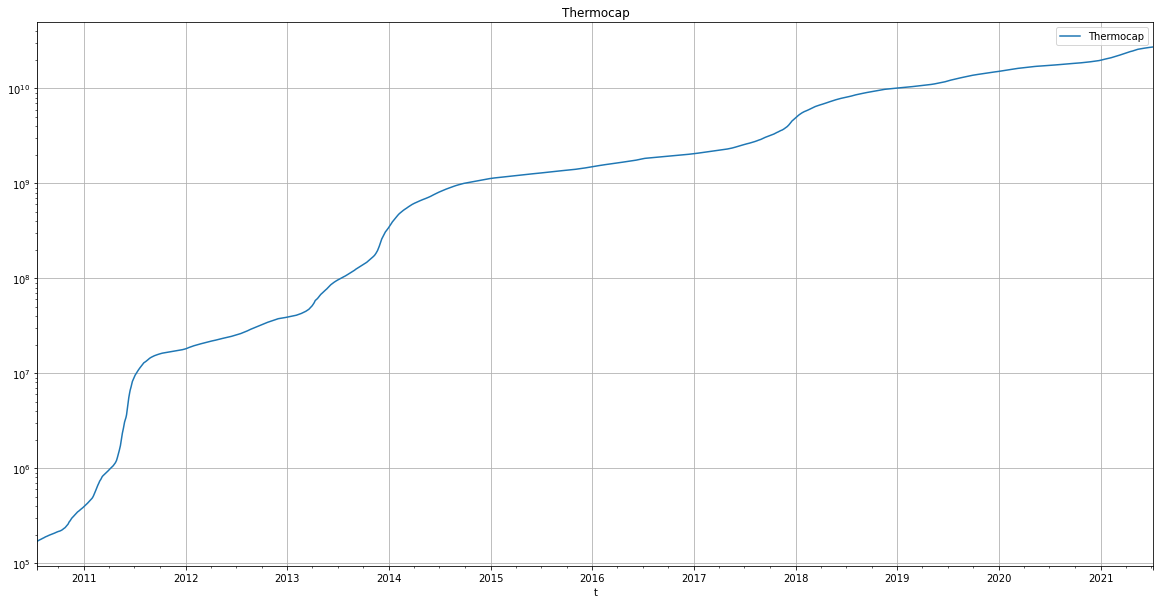

In [63]:
thermocap_df.plot(figsize=(20,10), grid=True, logy=True, title='Thermocap')

In [64]:
### Build Level-3-Dataframe: security_df_l3

In [65]:
security_df_l3 = pd.concat([miner_revenue_df,difficulty_df, thermocap_df],axis=1).dropna()
security_df_l3

,Miner Revenue,Difficulty,Thermocap
t,,,
2010-07-18,8600.830000,0.608607,1.708201e+05
2010-07-19,8700.090000,0.652693,1.716100e+05
2010-07-20,9050.000000,0.686378,1.723301e+05
2010-07-21,10350.000000,0.713103,1.730580e+05
2010-07-22,8800.000000,0.728067,1.736565e+05
...,...,...,...
2021-07-06,934.574453,0.078526,2.727725e+10
2021-07-07,806.598127,0.088585,2.730382e+10
2021-07-08,898.027984,0.098761,2.733241e+10


In [66]:
security_df_l3.corr()

,Miner Revenue,Difficulty,Thermocap
Miner Revenue,1.000000,0.615002,-0.633555
Difficulty,0.615002,1.000000,-0.460445
Thermocap,-0.633555,-0.460445,1.000000


In [67]:
# Build the second of three Level-2-Dataframes: Network Health

In [68]:
network_health_df_l2 = pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()

In [69]:
network_health_df_l2

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Miner Revenue,Difficulty,Thermocap
t,,,,,,,,
2010-07-18,757.0,3.606926e+04,0.010432,3447600.00,8600.00,8600.830000,0.608607,1.708201e+05
2010-07-19,808.0,4.714966e+04,0.013640,3456300.00,8700.00,8700.090000,0.652693,1.716100e+05
2010-07-20,728.0,2.990234e+04,0.008629,3465350.00,9050.00,9050.000000,0.686378,1.723301e+05
2010-07-21,621.0,2.765454e+04,0.007955,3475700.00,10350.00,10350.000000,0.713103,1.730580e+05
2010-07-22,427.0,3.963162e+04,0.011374,3484500.00,8800.00,8800.000000,0.728067,1.736565e+05
...,...,...,...,...,...,...,...,...
2021-07-06,838259.0,1.332011e+06,0.020433,18749743.75,887.50,934.574453,0.078526,2.727725e+10
2021-07-07,812872.0,1.324880e+06,0.022266,18750512.50,768.75,806.598127,0.088585,2.730382e+10
2021-07-08,800764.0,3.250505e+06,0.022810,18751381.25,868.75,898.027984,0.098761,2.733241e+10


In [70]:
network_health_df_l2.corr()

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Miner Revenue,Difficulty,Thermocap
Active Address,1.000000,0.142633,-0.154971,0.878633,-0.811046,-0.801790,-0.546485,0.803105
Total Transfer Volume,0.142633,1.000000,0.884312,0.143719,-0.087205,-0.081499,-0.174716,0.002376
Velocity,-0.154971,0.884312,1.000000,-0.136048,0.187409,0.190253,-0.014189,-0.204899
Circulating Supply,0.878633,0.143719,-0.136048,1.000000,-0.934539,-0.933463,-0.670883,0.700234
Issuance,-0.811046,-0.087205,0.187409,-0.934539,1.000000,0.999320,0.613761,-0.630124
Miner Revenue,-0.801790,-0.081499,0.190253,-0.933463,0.999320,1.000000,0.615002,-0.633555
Difficulty,-0.546485,-0.174716,-0.014189,-0.670883,0.613761,0.615002,1.000000,-0.460445
Thermocap,0.803105,0.002376,-0.204899,0.700234,-0.630124,-0.633555,-0.460445,1.000000


In [71]:
# Due to the high correlation between Issuance and Miner Revenue, drop Miner Revenue from security_df_l3

In [72]:
security_df_l3=security_df_l3.drop(columns='Miner Revenue')

In [73]:
security_df_l3

,Difficulty,Thermocap
t,,
2010-07-18,0.608607,1.708201e+05
2010-07-19,0.652693,1.716100e+05
2010-07-20,0.686378,1.723301e+05
2010-07-21,0.713103,1.730580e+05
2010-07-22,0.728067,1.736565e+05
...,...,...
2021-07-06,0.078526,2.727725e+10
2021-07-07,0.088585,2.730382e+10
2021-07-08,0.098761,2.733241e+10


In [74]:
network_health_df_l2= pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()
network_health_df_l2.corr()

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap
Active Address,1.000000,0.142633,-0.154971,0.878633,-0.811046,-0.546485,0.803105
Total Transfer Volume,0.142633,1.000000,0.884312,0.143719,-0.087205,-0.174716,0.002376
Velocity,-0.154971,0.884312,1.000000,-0.136048,0.187409,-0.014189,-0.204899
Circulating Supply,0.878633,0.143719,-0.136048,1.000000,-0.934539,-0.670883,0.700234
Issuance,-0.811046,-0.087205,0.187409,-0.934539,1.000000,0.613761,-0.630124
Difficulty,-0.546485,-0.174716,-0.014189,-0.670883,0.613761,1.000000,-0.460445
Thermocap,0.803105,0.002376,-0.204899,0.700234,-0.630124,-0.460445,1.000000


In [75]:
# Use heat map to visualize correlation
network_health_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=700,
    height=500
)

:HeatMap   [columns,index]   (value)

In [76]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [77]:
## Extract Miner Unspent Supply (UTXO)

In [78]:
utxo = requests.get('https://api.glassnode.com/v1/metrics/mining/miners_unspent_supply', params={'a': coin, 'api_key': API_KEY})

In [79]:
utxo_df = pd.read_json(utxo.text, convert_dates=['t'])
utxo_df.set_index('t', inplace=True)
utxo_df = utxo_df.rename(columns={'v':'UTXO'})
utxo_df

,UTXO
t,
2009-01-03,5.000000e+01
2009-01-04,5.000000e+01
2009-01-05,5.000000e+01
2009-01-06,5.000000e+01
2009-01-07,5.000000e+01
...,...
2020-07-06,1.765835e+06
2020-07-07,1.765756e+06
2020-07-08,1.765617e+06


In [80]:
## Extract Coin Years Destroyed (CYD)  

In [81]:
cyd = requests.get('https://api.glassnode.com/v1/metrics/indicators/cyd', params={'a': coin, 'api_key': API_KEY})

In [82]:
cyd_df = pd.read_json(cyd.text, convert_dates=['t'])
cyd_df.set_index('t', inplace=True)
cyd_df = cyd_df.rename(columns={'v':'CYD'})
cyd_df

,CYD
t,
2010-01-11,3.461755e+06
2010-01-12,3.943371e+06
2010-01-13,3.943582e+06
2010-01-14,3.949321e+06
2010-01-15,3.949512e+06
...,...
2021-07-06,4.573218e+09
2021-07-07,4.571468e+09
2021-07-08,4.560950e+09


In [83]:
## Net Unrealized Profit & Losses (NUPL) 

In [84]:
nupl = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [85]:
nupl_df = pd.read_json(nupl.text, convert_dates=['t'])
nupl_df.set_index('t', inplace=True)
nupl_df = nupl_df.rename(columns={'v':'NUPL'})
nupl_df

,NUPL
t,
2010-07-18,0.421756
2010-07-19,0.380821
2010-07-20,0.328775
2010-07-21,0.365481
2010-07-22,0.102038
...,...
2021-07-06,0.433471
2021-07-07,0.428202
2021-07-08,0.411357


In [86]:
## Realized Cap (RC) 

In [87]:
rc = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_realized_usd', params={'a': coin, 'api_key': API_KEY})

In [88]:
rc_df = pd.read_json(rc.text, convert_dates=['t'])
rc_df.set_index('t', inplace=True)
rc_df = rc_df.rename(columns={'v':'Realized Cap'})
rc_df

,Realized Cap
t,
2009-01-03,2.475500e+00
2009-01-04,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2021-07-06,3.627395e+11
2021-07-07,3.628266e+11
2021-07-08,3.624590e+11


In [89]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [90]:
buyer_and_seller_behavior_df_l2=pd.concat([utxo_df,cyd_df,nupl_df,rc_df],axis=1).dropna()
buyer_and_seller_behavior_df_l2

,UTXO,CYD,NUPL,Realized Cap
t,,,,
2010-07-18,2.382007e+06,5.396822e+07,0.421756,1.711265e+05
2010-07-19,2.379557e+06,5.441558e+07,0.380821,1.729175e+05
2010-07-20,2.383107e+06,5.440775e+07,0.328775,1.738318e+05
2010-07-21,2.381757e+06,5.530445e+07,0.365481,1.746896e+05
2010-07-22,2.387157e+06,5.557529e+07,0.102038,1.750491e+05
...,...,...,...,...
2020-07-06,1.765835e+06,3.073557e+09,0.372642,1.074412e+11
2020-07-07,1.765756e+06,3.072857e+09,0.369753,1.074773e+11
2020-07-08,1.765617e+06,3.077731e+09,0.380346,1.076240e+11


In [91]:
buyer_and_seller_behavior_df_l2.corr()

,UTXO,CYD,NUPL,Realized Cap
UTXO,1.000000,-0.760551,0.097262,-0.571984
CYD,-0.760551,1.000000,0.140405,0.756661
NUPL,0.097262,0.140405,1.000000,-0.019184
Realized Cap,-0.571984,0.756661,-0.019184,1.000000


In [92]:
# Use heat map to visualize correlation
buyer_and_seller_behavior_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=400,
    height=300
)

:HeatMap   [columns,index]   (value)

In [93]:
# Build the third of three Level-2-Dataframes: Valuation

In [94]:
## Extact stock-to-flow data

In [95]:
stf = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [96]:
stf_df = pd.read_json(stf.text, convert_dates=['t'])
stf_df.set_index('t', inplace=True)
stf_df = stf_df.rename(columns={'v':'Stock to Flow'})
stf_df

,Stock to Flow
t,
2010-07-18,0.421756
2010-07-19,0.380821
2010-07-20,0.328775
2010-07-21,0.365481
2010-07-22,0.102038
...,...
2021-07-06,0.433471
2021-07-07,0.428202
2021-07-08,0.411357


<AxesSubplot:title={'center':'Stock to Flow'}, xlabel='t'>

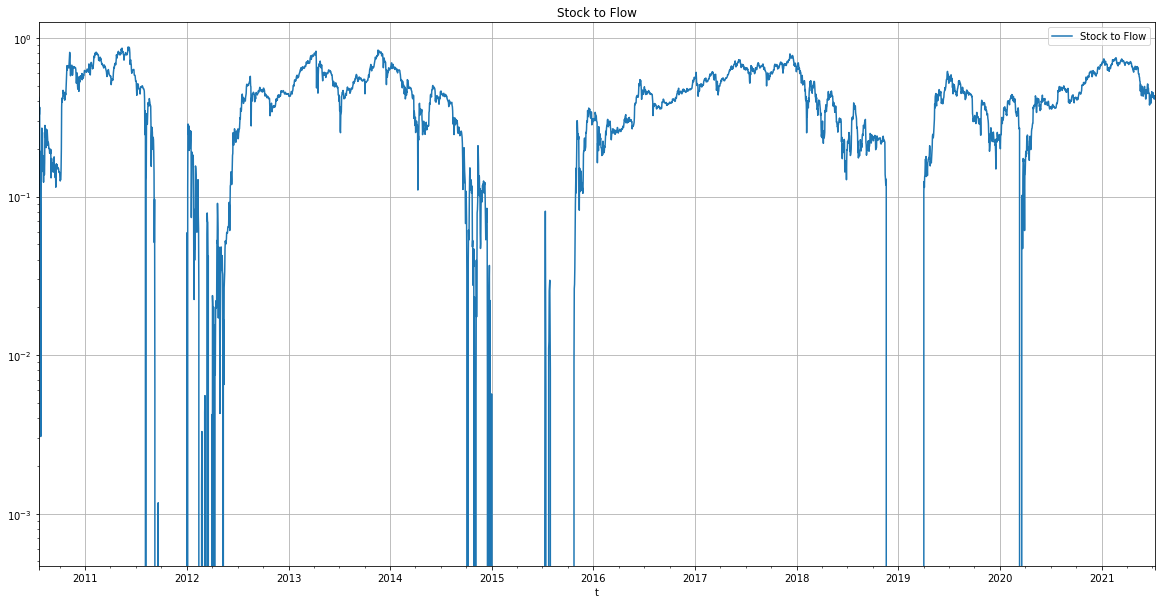

In [97]:
stf_df.plot(figsize=(20,10), grid=True, logy=True, title='Stock to Flow')

In [98]:
## Extract Market Cap to Thermocap Ratio

In [99]:
mcttc = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [100]:
mcttc_df = pd.read_json(mcttc.text, convert_dates=['t'])
mcttc_df.set_index('t', inplace=True)
mcttc_df = mcttc_df.rename(columns={'v':'Market Cap/Thermo Cap'})
mcttc_df

,Market Cap/Thermo Cap
t,
2010-07-18,0.421756
2010-07-19,0.380821
2010-07-20,0.328775
2010-07-21,0.365481
2010-07-22,0.102038
...,...
2021-07-06,0.433471
2021-07-07,0.428202
2021-07-08,0.411357


<AxesSubplot:title={'center':'Market Cap/Thermo Cap'}, xlabel='t'>

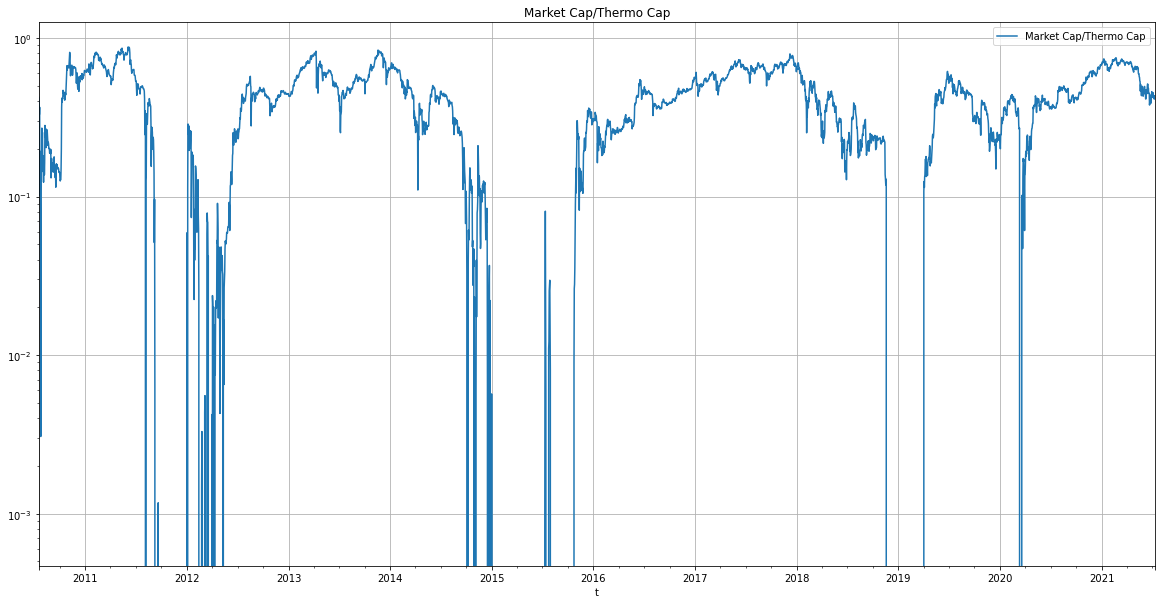

In [101]:
mcttc_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Cap/Thermo Cap')

In [102]:
## Extract SOPR data

In [103]:
sopr = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr', params={'a': coin, 'api_key': API_KEY})

In [104]:
sopr_df = pd.read_json(sopr.text, convert_dates=['t'])
sopr_df.set_index('t', inplace=True)
sopr_df = sopr_df.rename(columns={'v':'SOPR'})
sopr_df

,SOPR
t,
2010-07-17,1.000000
2010-07-18,1.174760
2010-07-19,1.318536
2010-07-20,1.090517
2010-07-21,1.065532
...,...
2021-07-06,0.998673
2021-07-07,1.001324
2021-07-08,0.996299


<AxesSubplot:title={'center':'SOPR'}, xlabel='t'>

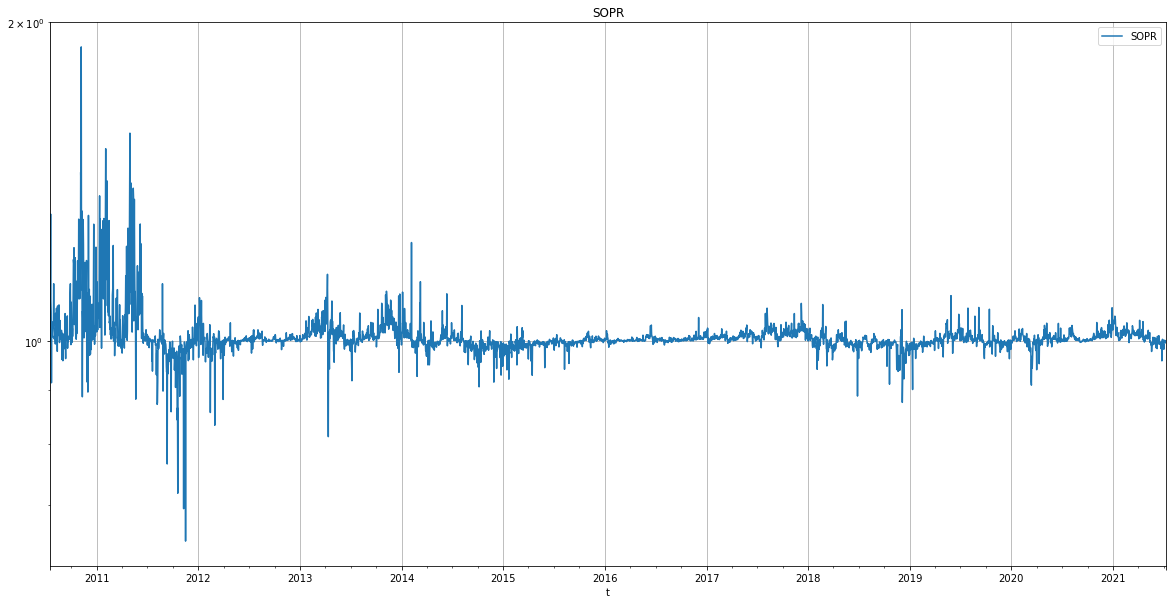

In [105]:
sopr_df.plot(figsize=(20,10), grid=True, logy=True, title='SOPR')

In [106]:
## Extract Futures Perpetual Funding Rates data

In [107]:
fpfr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_funding_rate_perpetual', params={'a': coin, 'api_key': API_KEY})

In [108]:
fpfr_df = pd.read_json(fpfr.text, convert_dates=['t'])
fpfr_df.set_index('t', inplace=True)
fpfr_df = fpfr_df.rename(columns={'v':'Futures Perpetual Funding Rates'})
fpfr_df

,Futures Perpetual Funding Rates
t,
2021-06-11,0.000012
2021-06-12,-0.000065
2021-06-13,0.000019
2021-06-14,0.000040
2021-06-15,0.000047
2021-06-16,-0.000005
2021-06-17,-0.000039
2021-06-18,-0.000077
2021-06-19,-0.000060


<AxesSubplot:title={'center':'Futures Perpetual Funding Rates'}, xlabel='t'>

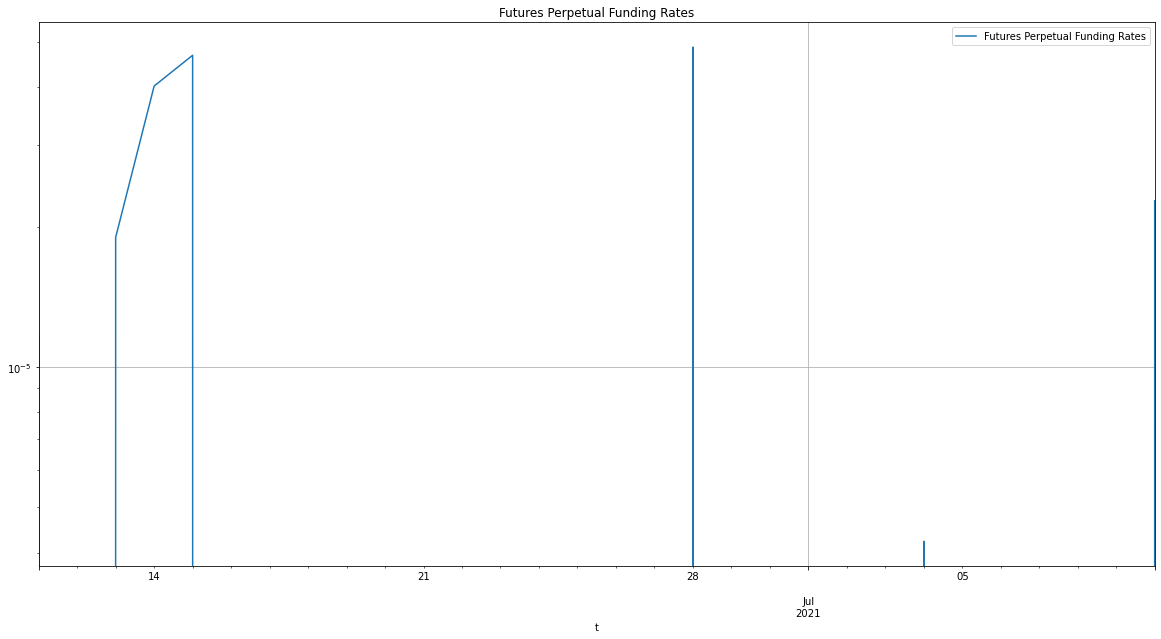

In [109]:
fpfr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Perpetual Funding Rates')

In [110]:
## Extract Futures Estimated Leverage Ratio

In [111]:
felr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [112]:
felr_df = pd.read_json(felr.text, convert_dates=['t'])
felr_df.set_index('t', inplace=True)
felr_df = felr_df.rename(columns={'v':'Futures Estimated Leverage Ratio'})
felr_df

,Futures Estimated Leverage Ratio
t,
2020-05-15,0.166281
2020-05-16,0.165119
2020-05-17,0.170652
2020-05-18,0.167470
2020-05-19,0.166283
...,...
2021-07-06,0.156213
2021-07-07,0.158095
2021-07-08,0.164778


<AxesSubplot:title={'center':'Futures Estimated Leverage Ratio'}, xlabel='t'>

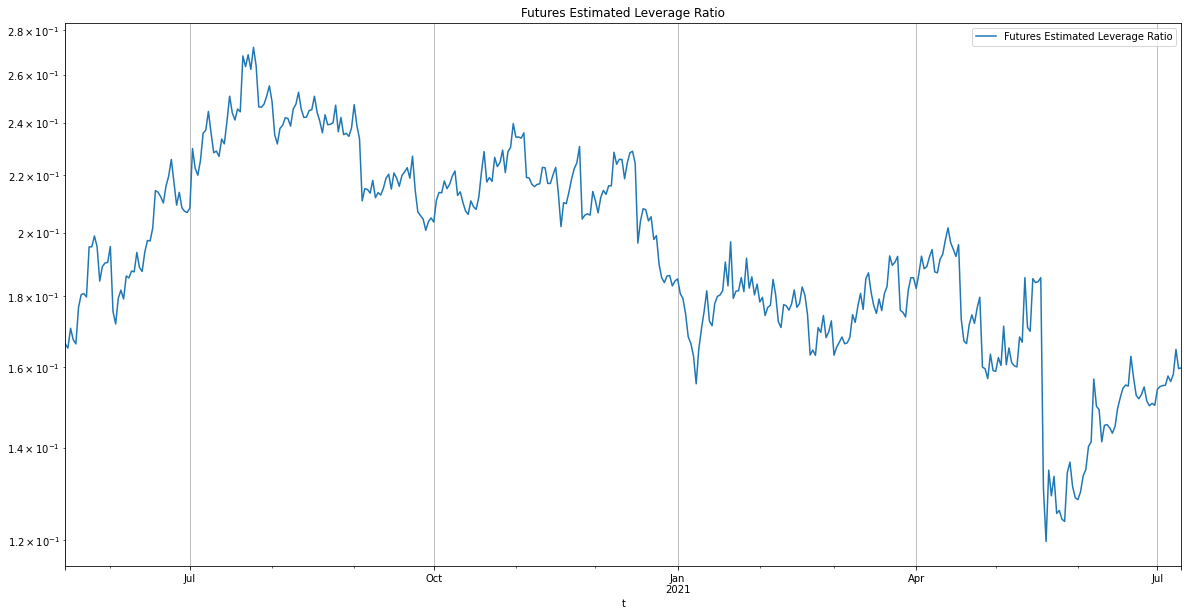

In [113]:
felr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Estimated Leverage Ratio')

In [114]:
## Extract MVRV Ratio

In [115]:
mvrv = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [116]:
mvrv_df = pd.read_json(mvrv.text, convert_dates=['t'])
mvrv_df.set_index('t', inplace=True)
mvrv_df = mvrv_df.rename(columns={'v':'Market Value/Realized Value'})
mvrv_df

,Market Value/Realized Value
t,
2020-05-15,0.166281
2020-05-16,0.165119
2020-05-17,0.170652
2020-05-18,0.167470
2020-05-19,0.166283
...,...
2021-07-06,0.156213
2021-07-07,0.158095
2021-07-08,0.164778


<AxesSubplot:title={'center':'Market Value to Realized Value Ratio'}, xlabel='t'>

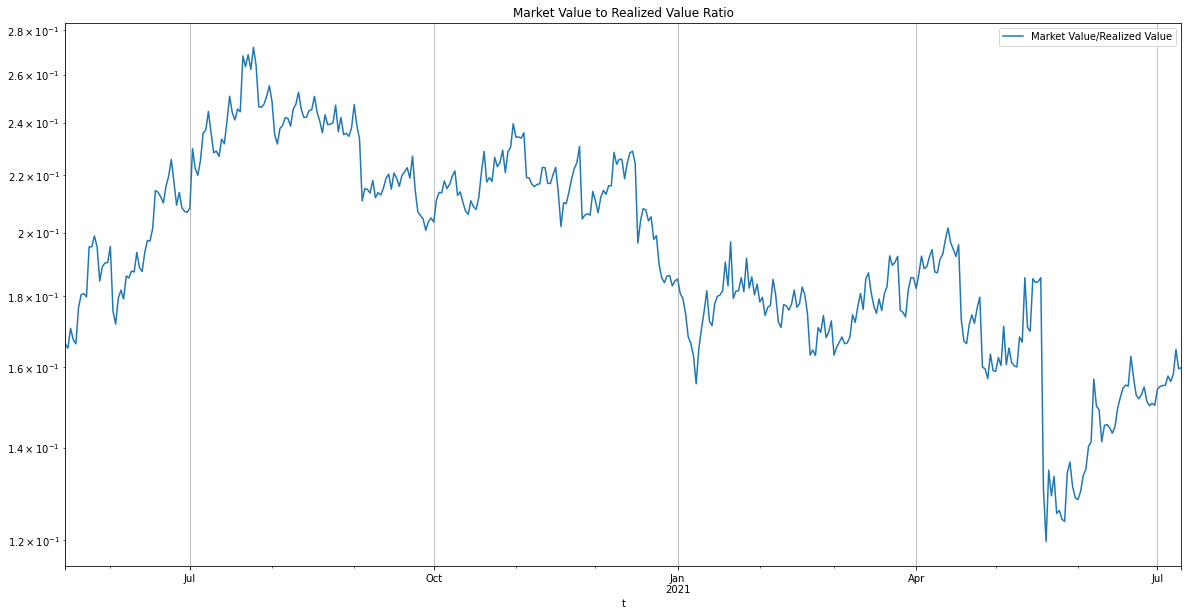

In [117]:
mvrv_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Value to Realized Value Ratio')

In [118]:
## Extract Puell Multiple

In [119]:
puell = requests.get('https://api.glassnode.com/v1/metrics/indicators/puell_multiple', params={'a': coin, 'api_key': API_KEY})

In [120]:
puell_df = pd.read_json(puell.text, convert_dates=['t'])
puell_df.set_index('t', inplace=True)
puell_df = puell_df.rename(columns={'v':'Puell Multiple'})
puell_df

,Puell Multiple
t,
2011-07-16,3.656330
2011-07-17,3.830945
2011-07-18,3.691357
2011-07-19,3.244558
2011-07-20,3.366804
...,...
2021-07-06,1.137611
2021-07-07,0.994784
2021-07-08,1.068654


<AxesSubplot:title={'center':'Puell Multiple'}, xlabel='t'>

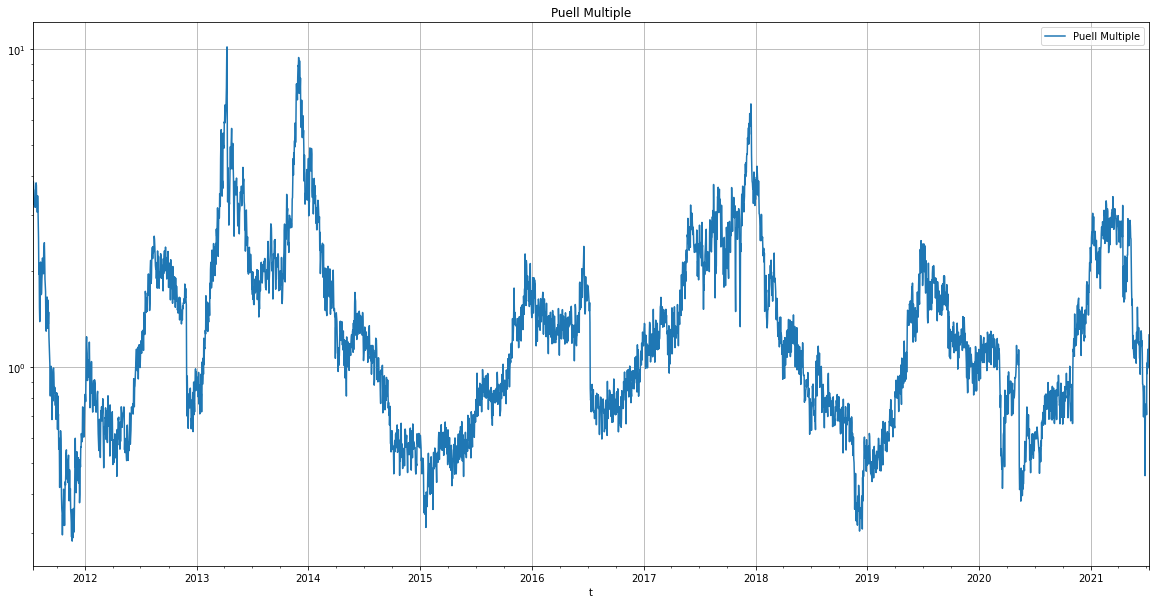

In [121]:
puell_df.plot(figsize=(20,10), grid=True, logy=True, title='Puell Multiple')

In [122]:
## Extract Stablecoin Supply Ratio (SSR) Oscillator

In [123]:
ssro = requests.get('https://api.glassnode.com/v1/metrics/indicators/ssr_oscillator', params={'a': coin, 'api_key': API_KEY})

In [124]:
ssro_df = pd.read_json(ssro.text, convert_dates=['t'])
ssro_df.set_index('t', inplace=True)
ssro_df = ssro_df.rename(columns={'v':'Stablecoin Supply Ratio (SSR) Oscillator'})
ssro_df

,Stablecoin Supply Ratio (SSR) Oscillator
t,
2018-09-04,-0.833493
2018-09-05,-0.887271
2018-09-06,-1.171063
2018-09-07,-1.163901
2018-09-08,-1.198452
...,...
2021-07-06,-1.659758
2021-07-07,-1.629375
2021-07-08,-1.662471


<AxesSubplot:title={'center':'Stablecoin Supply Ratio (SSR) Oscillator'}, xlabel='t'>

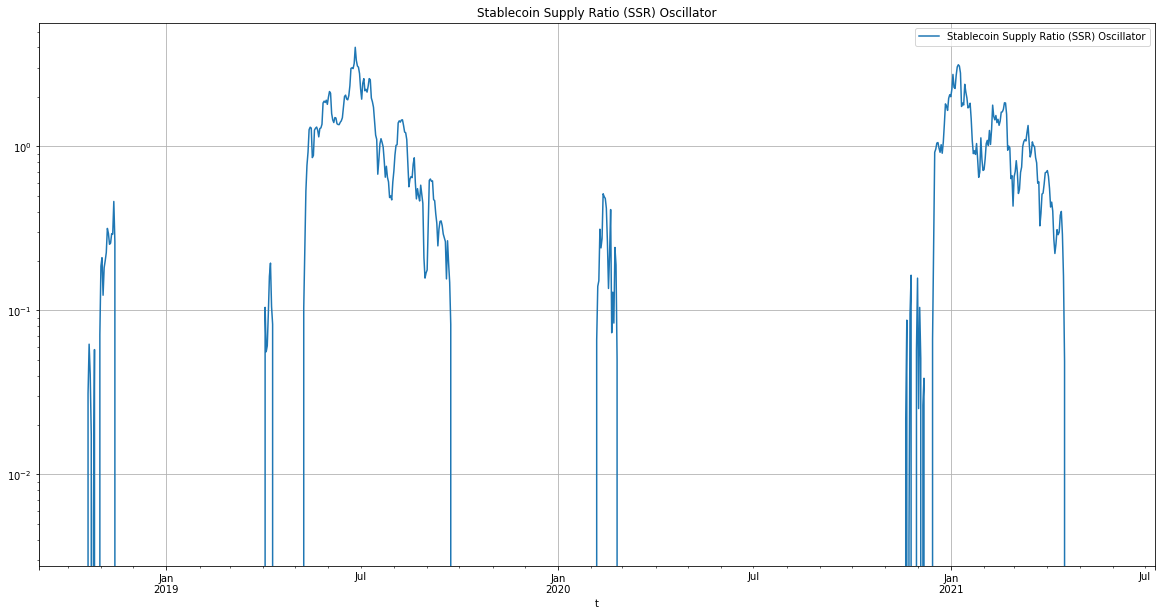

In [125]:
ssro_df.plot(figsize=(20,10), grid=True, logy=True, title='Stablecoin Supply Ratio (SSR) Oscillator')

In [126]:
## Extract Exchange Net Position Change

In [127]:
enpc = requests.get('https://api.glassnode.com/v1/metrics/distribution/exchange_net_position_change', params={'a': coin, 'api_key': API_KEY})

In [128]:
enpc_df = pd.read_json(enpc.text, convert_dates=['t'])
enpc_df.set_index('t', inplace=True)
enpc_df = enpc_df.rename(columns={'v':'Exchange Net Position Change'})
enpc_df

,Exchange Net Position Change
t,
2011-09-16,74.789093
2011-09-17,69.740065
2011-09-18,30.148647
2011-09-19,38.196675
2011-09-20,36.377675
...,...
2021-07-06,-23792.696649
2021-07-07,-29168.410551
2021-07-08,-26830.993895


<AxesSubplot:title={'center':'Exchange Net Position Change'}, xlabel='t'>

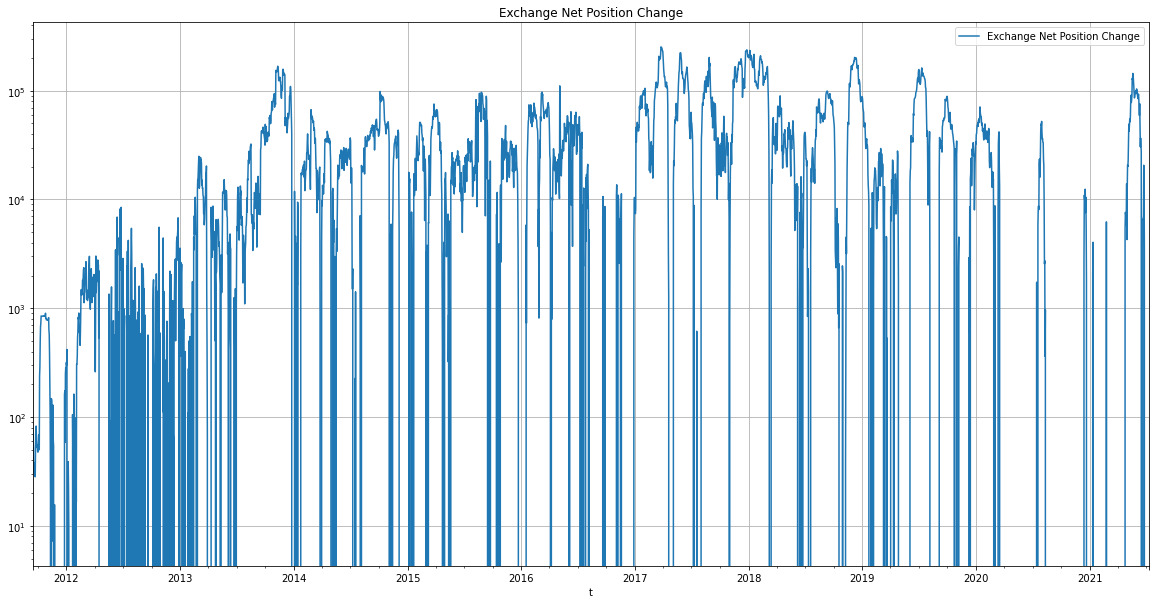

In [129]:
enpc_df.plot(figsize=(20,10), grid=True, logy=True, title='Exchange Net Position Change')

In [130]:
## Extract Grayscale Premium

In [131]:
gp = requests.get('https://api.glassnode.com/v1/metrics/institutions/grayscale_premium_percent', params={'a': coin, 'api_key': API_KEY})

In [132]:
gp_df = pd.read_json(gp.text, convert_dates=['t'])
gp_df.set_index('t', inplace=True)
gp_df = gp_df.rename(columns={'v':'Grayscale Premium'})
gp_df

,Grayscale Premium
t,
2021-01-11,0.156400
2021-01-12,0.180200
2021-01-13,0.240200
2021-01-14,0.195300
2021-01-15,0.115600
...,...
2021-07-05,-0.088357
2021-07-06,-0.106131
2021-07-07,-0.115112


<AxesSubplot:title={'center':'Grayscale Premium'}, xlabel='t'>

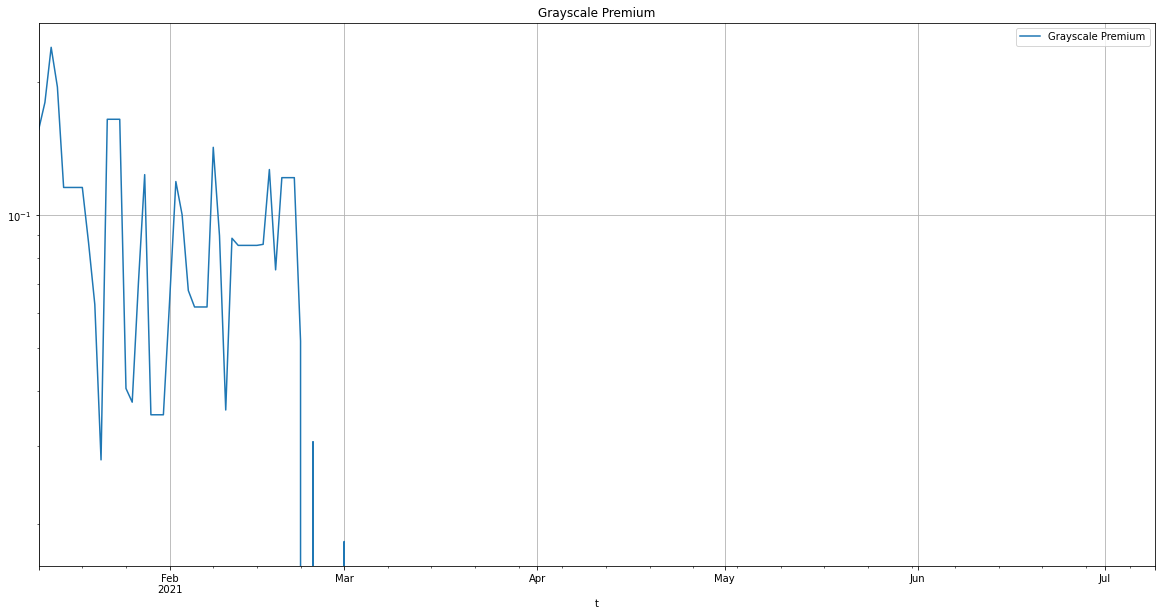

In [133]:
gp_df.plot(figsize=(20,10), grid=True, logy=True, title='Grayscale Premium')

In [134]:
## Extract Block Interval Mean

In [135]:
bim = requests.get('https://api.glassnode.com/v1/metrics/blockchain/block_interval_mean', params={'a': coin, 'api_key': API_KEY})

In [136]:
bim_df = pd.read_json(bim.text, convert_dates=['t'])
bim_df.set_index('t', inplace=True)
bim_df = bim_df.rename(columns={'v':'Block Interval Mean'})
bim_df

,Block Interval Mean
t,
2009-01-09,33506.000000
2009-01-10,2561.196721
2009-01-11,917.838710
2009-01-12,923.042553
2009-01-13,707.504065
...,...
2021-07-06,607.676056
2021-07-07,702.902439
2021-07-08,613.726619


<AxesSubplot:title={'center':'Block Interval Mean'}, xlabel='t'>

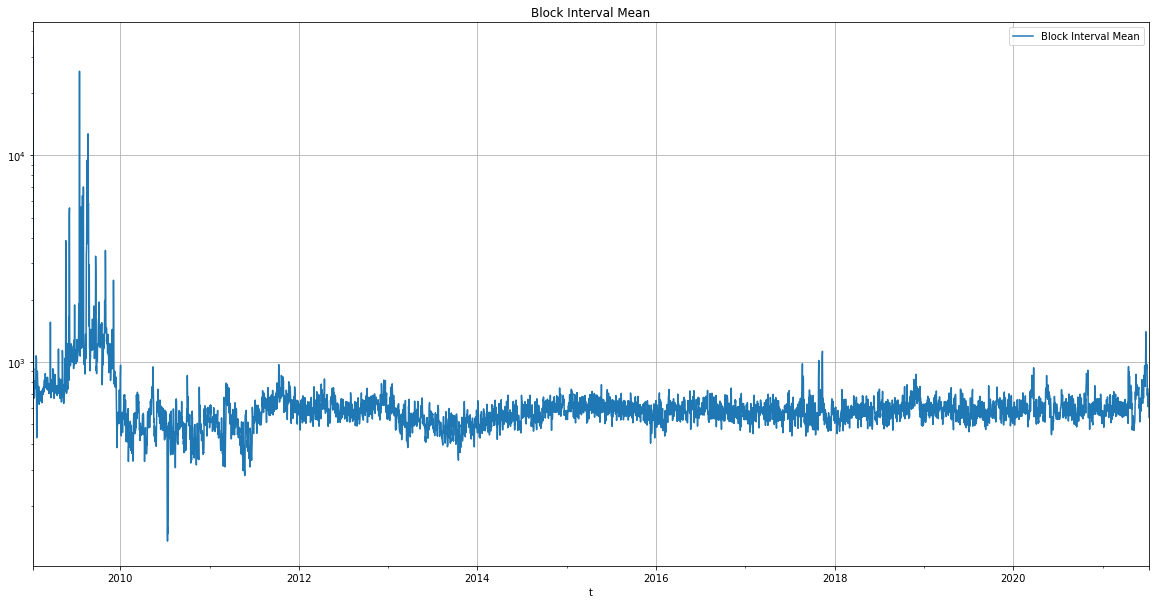

In [137]:
bim_df.plot(figsize=(20,10), grid=True, logy=True, title='Block Interval Mean')

In [138]:
# Set up the third of three sub-dataframes: Valuation

In [139]:
valuation_df_l2 = pd.concat([stf_df,mcttc_df,sopr_df,fpfr_df,felr_df,mvrv_df,puell_df,ssro_df,enpc_df,gp_df,bim_df],axis=1)
valuation_df_l2

,Stock to Flow,Market Cap/Thermo Cap,SOPR,Futures Perpetual Funding Rates,Futures Estimated Leverage Ratio,Market Value/Realized Value,Puell Multiple,Stablecoin Supply Ratio (SSR) Oscillator,Exchange Net Position Change,Grayscale Premium,Block Interval Mean
t,,,,,,,,,,,
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33506.000000
2009-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2561.196721
2009-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,917.838710
2009-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923.042553
2009-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.504065
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06,0.433471,0.433471,0.998673,-0.000119,0.156213,0.156213,1.137611,-1.659758,-23792.696649,-0.106131,607.676056
2021-07-07,0.428202,0.428202,1.001324,-0.000009,0.158095,0.158095,0.994784,-1.629375,-29168.410551,-0.115112,702.902439
2021-07-08,0.411357,0.411357,0.996299,-0.000068,0.164778,0.164778,1.068654,-1.662471,-26830.993895,-0.118328,613.726619


In [140]:
valuation_df_l2.corr()

,Stock to Flow,Market Cap/Thermo Cap,SOPR,Futures Perpetual Funding Rates,Futures Estimated Leverage Ratio,Market Value/Realized Value,Puell Multiple,Stablecoin Supply Ratio (SSR) Oscillator,Exchange Net Position Change,Grayscale Premium,Block Interval Mean
Stock to Flow,1.000000,1.000000,0.399929,0.675787,-0.308926,-0.308926,0.627871,0.539661,0.081563,0.498091,-0.298538
Market Cap/Thermo Cap,1.000000,1.000000,0.399929,0.675787,-0.308926,-0.308926,0.627871,0.539661,0.081563,0.498091,-0.298538
SOPR,0.399929,0.399929,1.000000,0.457324,0.061963,0.061963,0.439078,0.539264,0.040034,0.450078,-0.262383
Futures Perpetual Funding Rates,0.675787,0.675787,0.457324,1.000000,-0.418997,-0.418997,0.528192,0.200131,0.056268,-0.138456,-0.368456
Futures Estimated Leverage Ratio,-0.308926,-0.308926,0.061963,-0.418997,1.000000,1.000000,-0.435661,-0.003680,-0.432433,0.359251,-0.242975
Market Value/Realized Value,-0.308926,-0.308926,0.061963,-0.418997,1.000000,1.000000,-0.435661,-0.003680,-0.432433,0.359251,-0.242975
Puell Multiple,0.627871,0.627871,0.439078,0.528192,-0.435661,-0.435661,1.000000,0.685415,0.264483,0.417937,-0.409175
Stablecoin Supply Ratio (SSR) Oscillator,0.539661,0.539661,0.539264,0.200131,-0.003680,-0.003680,0.685415,1.000000,-0.043617,0.761492,-0.249971
Exchange Net Position Change,0.081563,0.081563,0.040034,0.056268,-0.432433,-0.432433,0.264483,-0.043617,1.000000,-0.464770,-0.100644
Grayscale Premium,0.498091,0.498091,0.450078,-0.138456,0.359251,0.359251,0.417937,0.761492,-0.464770,1.000000,-0.240119


In [141]:
# Due to high correlation, drop "Market Cap/Thermo Cap" and "Market Value/Realized Value".
# Due to limited data availability, drop fplr, felr, mvrv, ssro, gp

In [142]:
valuation_df_l2 = valuation_df_l2.drop(columns=['Market Cap/Thermo Cap','Market Value/Realized Value','Futures Perpetual Funding Rates','Futures Estimated Leverage Ratio','Stablecoin Supply Ratio (SSR) Oscillator','Grayscale Premium'])
valuation_df_l2.corr()

,Stock to Flow,SOPR,Puell Multiple,Exchange Net Position Change,Block Interval Mean
Stock to Flow,1.000000,0.399929,0.627871,0.081563,-0.298538
SOPR,0.399929,1.000000,0.439078,0.040034,-0.262383
Puell Multiple,0.627871,0.439078,1.000000,0.264483,-0.409175
Exchange Net Position Change,0.081563,0.040034,0.264483,1.000000,-0.100644
Block Interval Mean,-0.298538,-0.262383,-0.409175,-0.100644,1.000000


In [143]:
# heatmap of correlation
valuation_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=600,
    height=400
)

:HeatMap   [columns,index]   (value)

In [144]:
# Build Feature Dataframe

In [145]:
features_df = pd.concat([network_health_df_l2,buyer_and_seller_behavior_df_l2,valuation_df_l2],axis=1)
features_df

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap,UTXO,CYD,NUPL,Realized Cap,Stock to Flow,SOPR,Puell Multiple,Exchange Net Position Change,Block Interval Mean
t,,,,,,,,,,,,,,,,
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33506.000000
2009-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2561.196721
2009-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,917.838710
2009-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923.042553
2009-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.504065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06,838259.0,1.332011e+06,0.020433,18749743.75,887.50,0.078526,2.727725e+10,NaN,NaN,NaN,NaN,0.433471,0.998673,1.137611,-23792.696649,607.676056
2021-07-07,812872.0,1.324880e+06,0.022266,18750512.50,768.75,0.088585,2.730382e+10,NaN,NaN,NaN,NaN,0.428202,1.001324,0.994784,-29168.410551,702.902439
2021-07-08,800764.0,3.250505e+06,0.022810,18751381.25,868.75,0.098761,2.733241e+10,NaN,NaN,NaN,NaN,0.411357,0.996299,1.068654,-26830.993895,613.726619


In [146]:
# Heatmap visualization
features_df.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=1000,
    height=800
)

:HeatMap   [columns,index]   (value)

In [147]:
# Build RandomForrestRegressor model

In [152]:
# Get BTC prices as y dataframe
btc_price_text = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close', params={'a': coin, 'api_key': API_KEY})

In [153]:
btc_price_df = pd.read_json(btc_price_text.text, convert_dates=['t'])
btc_price_df.set_index('t', inplace=True)
btc_price_df = btc_price_df.rename(columns={'v':'BTC Prices'})
btc_price_df['Daily Return']=btc_price_df.pct_change()
btc_price_df

,BTC Prices,Daily Return
t,,
2010-07-17,0.049510,NaN
2010-07-18,0.085840,0.733791
2010-07-19,0.080800,-0.058714
2010-07-20,0.074733,-0.075083
2010-07-21,0.079210,0.059902
...,...,...
2021-07-07,33850.914091,-0.009017
2021-07-08,32847.396790,-0.029645
2021-07-09,33878.236862,0.031383


In [154]:
# btc_price_df['daily_return']=btc_price_df.pct_change()
# btc_price_df

In [155]:
full_data_df = pd.concat([features_df,btc_price_df],axis=1)
full_data_df = full_data_df.drop(columns=['UTXO','CYD','NUPL','Realized Cap'])
full_data_df = full_data_df.dropna()
full_data_df

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap,Stock to Flow,SOPR,Puell Multiple,Exchange Net Position Change,Block Interval Mean,BTC Prices,Daily Return
t,,,,,,,,,,,,,,
2011-09-16,14298.0,6.686519e+05,0.091714,7282650.00,5950.00,0.201774,1.549893e+07,-0.269386,0.966420,0.683785,74.789093,727.445378,4.811000,0.001058
2011-09-17,12877.0,3.474938e+05,0.047538,7289350.00,6700.00,0.198742,1.553111e+07,-0.281332,0.979530,0.766186,69.740065,649.186567,4.764700,-0.009624
2011-09-18,14074.0,2.909793e+05,0.039746,7297250.00,7900.00,0.195757,1.556955e+07,-0.175390,0.981822,0.913495,30.148647,552.993671,5.238233,0.099384
2011-09-19,15826.0,3.283994e+05,0.044772,7303600.00,6350.00,0.192818,1.560236e+07,-0.110628,0.968994,0.782018,38.196675,676.834646,5.462771,0.042865
2011-09-20,21668.0,3.465190e+05,0.047339,7310600.00,7000.00,0.189927,1.564377e+07,0.001172,0.998393,0.981353,36.377675,620.750000,6.114797,0.119358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06,838259.0,1.332011e+06,0.020433,18749743.75,887.50,0.078526,2.727725e+10,0.433471,0.998673,1.137611,-23792.696649,607.676056,34158.921224,0.009967
2021-07-07,812872.0,1.324880e+06,0.022266,18750512.50,768.75,0.088585,2.730382e+10,0.428202,1.001324,0.994784,-29168.410551,702.902439,33850.914091,-0.009017
2021-07-08,800764.0,3.250505e+06,0.022810,18751381.25,868.75,0.098761,2.733241e+10,0.411357,0.996299,1.068654,-26830.993895,613.726619,32847.396790,-0.029645


In [156]:
X = full_data_df.drop(columns=['BTC Prices','Daily Return'])
X

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap,Stock to Flow,SOPR,Puell Multiple,Exchange Net Position Change,Block Interval Mean
t,,,,,,,,,,,,
2011-09-16,14298.0,6.686519e+05,0.091714,7282650.00,5950.00,0.201774,1.549893e+07,-0.269386,0.966420,0.683785,74.789093,727.445378
2011-09-17,12877.0,3.474938e+05,0.047538,7289350.00,6700.00,0.198742,1.553111e+07,-0.281332,0.979530,0.766186,69.740065,649.186567
2011-09-18,14074.0,2.909793e+05,0.039746,7297250.00,7900.00,0.195757,1.556955e+07,-0.175390,0.981822,0.913495,30.148647,552.993671
2011-09-19,15826.0,3.283994e+05,0.044772,7303600.00,6350.00,0.192818,1.560236e+07,-0.110628,0.968994,0.782018,38.196675,676.834646
2011-09-20,21668.0,3.465190e+05,0.047339,7310600.00,7000.00,0.189927,1.564377e+07,0.001172,0.998393,0.981353,36.377675,620.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06,838259.0,1.332011e+06,0.020433,18749743.75,887.50,0.078526,2.727725e+10,0.433471,0.998673,1.137611,-23792.696649,607.676056
2021-07-07,812872.0,1.324880e+06,0.022266,18750512.50,768.75,0.088585,2.730382e+10,0.428202,1.001324,0.994784,-29168.410551,702.902439
2021-07-08,800764.0,3.250505e+06,0.022810,18751381.25,868.75,0.098761,2.733241e+10,0.411357,0.996299,1.068654,-26830.993895,613.726619


In [157]:
y = full_data_df['BTC Prices']
y

t
2011-09-16        4.811000
2011-09-17        4.764700
2011-09-18        5.238233
2011-09-19        5.462771
2011-09-20        6.114797
                  ...     
2021-07-06    34158.921224
2021-07-07    33850.914091
2021-07-08    32847.396790
2021-07-09    33878.236862
2021-07-10    33517.873340
Freq: D, Name: BTC Prices, Length: 3586, dtype: float64

In [158]:
# Divide data set into traning and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.9)

In [159]:
# Instantiate data scaler
scaler = StandardScaler()

# Fit the Scaler with the training data
# X_scaler = scaler.fit(X_train)
X_scaler = scaler.fit(X)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X_test)

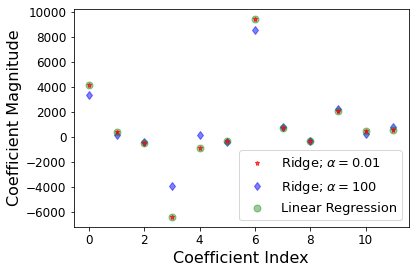

In [182]:
# Create the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_scaled, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train_scaled, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train_scaled, y_train)
train_score=lr.score(X_train_scaled, y_train)
test_score=lr.score(X_test_scaled, y_test)
Ridge_train_score = rr.score(X_train_scaled,y_train)
Ridge_test_score = rr.score(X_test_scaled, y_test)
Ridge_train_score100 = rr100.score(X_train_scaled,y_train)
Ridge_test_score100 = rr100.score(X_test_scaled, y_test)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [190]:
# Make predictions
lr_prediction = lr.predict(X_test_scaled)
rr_prediction = rr.predict(X_test_scaled)

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"lr_prediction": lr_prediction.ravel(), "rr_predition": rr_prediction.ravel(), "Actual Price": y_test})
results.head(60)

,lr_prediction,rr_predition,Actual Price
t,,,
2014-11-15,-3708.841153,-3708.784300,376.629005
2015-01-30,-4393.737760,-4393.681789,228.471456
2011-12-18,688.587515,688.353161,3.192505
2021-07-06,31145.193621,31145.025444,34158.921224
2014-08-11,-2604.278935,-2604.223110,573.956511
2019-01-25,6116.890304,6116.948350,3602.068037
2013-10-12,-1767.553973,-1767.553960,127.664018
2012-10-13,889.940413,890.070342,11.865473
2015-04-15,-2927.553409,-2927.462422,223.834800


In [194]:
# get importance
importance = lr.coef_

In [195]:
X_reset_index = X.reset_index()
column_names_12 = X_reset_index.iloc[0,1:13]
column_names_12 = pd.DataFrame(column_names_12)
column_names_12 = column_names_12.reset_index()
column_names_12

,index,0
0,Active Address,14298
1,Total Transfer Volume,668652
2,Velocity,0.0917143
3,Circulating Supply,7.28265e+06
4,Issuance,5950
5,Difficulty,0.201774
6,Thermocap,1.54989e+07
7,Stock to Flow,-0.269386
8,SOPR,0.96642
9,Puell Multiple,0.683785


In [196]:
# plot feature importance
importance_df = pd.DataFrame(importance)
importance_df['Features']=column_names_12['index']
importance_df=importance_df.set_index('Features')
importance_df.columns=['Importance']
importance_df

,Importance
Features,
Active Address,4157.607542
Total Transfer Volume,377.750361
Velocity,-500.493860
Circulating Supply,-6417.567073
Issuance,-901.654443
Difficulty,-311.476157
Thermocap,9432.613061
Stock to Flow,727.503927
SOPR,-317.819001


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Features'>

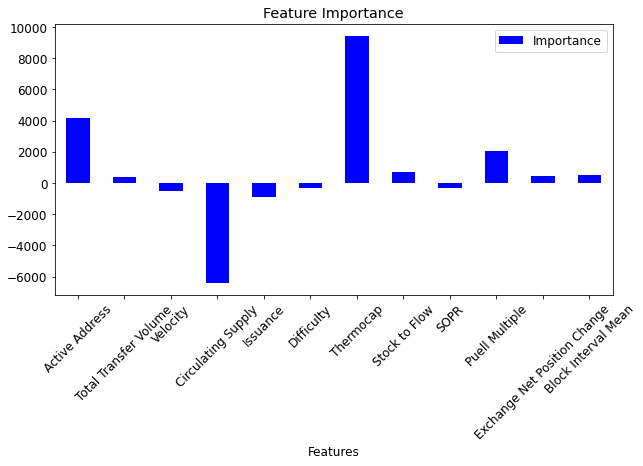

In [197]:
importance_df.plot(
    kind='bar',
    figsize=(10, 5), 
    title="Feature Importance", 
    color="blue", 
    rot=45
) 

In [198]:
import datetime as dt
from fbprophet import Prophet

In [199]:
X_scaled_df=pd.DataFrame(X_scaled)
X_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.876732,-0.422107,-0.307226,-0.411559,0.152936,0.487397,-0.658521,-0.656871,-0.292115,-0.829015,-0.244059,0.595022
1,-0.829462,-0.383948,-0.219859,-0.325040,0.127416,-0.458341,-0.646501,-2.012326,-1.166489,-0.956989,0.163195,0.694152
2,-1.363899,-0.650667,-0.347685,-2.168071,2.041452,-0.076295,-0.804530,-2.629039,-0.398773,-0.897154,-0.402142,0.092762
3,1.042542,-0.174044,-0.426584,1.233337,-1.180509,-0.426322,2.987644,0.380193,-0.208273,-0.297568,-0.834224,0.324632
4,-0.825715,-0.542279,-0.335890,-0.529376,0.688866,0.985585,-0.680531,0.195848,-0.134447,-0.223643,-0.031805,-1.100147
...,...,...,...,...,...,...,...,...,...,...,...,...
354,-0.866413,-0.359438,-0.160608,-0.578158,0.114655,1.537998,-0.693695,0.471548,0.612029,-0.306695,0.233606,0.795931
355,-1.352900,-0.638953,-0.269905,-2.336780,2.118013,0.507294,-0.804768,-1.796435,-1.145256,-0.590875,-0.396603,0.063386
356,1.170374,0.586450,-0.323055,1.143635,-1.234740,-0.917064,1.690462,0.585150,0.276657,-0.713364,-0.909112,1.513530
357,1.478426,0.477476,-0.293600,1.156958,-1.199649,-0.642575,1.755241,0.300292,-0.138712,-0.688741,-1.557165,0.579042


In [200]:
X_reset_index = X.reset_index()
column_names = X_reset_index.iloc[0,0:13]
column_names = pd.DataFrame(column_names)
column_names = column_names.reset_index()
#column_names.drop(columns='0')
column_names

,index,0
0,t,2011-09-16 00:00:00
1,Active Address,14298
2,Total Transfer Volume,668652
3,Velocity,0.0917143
4,Circulating Supply,7.28265e+06
5,Issuance,5950
6,Difficulty,0.201774
7,Thermocap,1.54989e+07
8,Stock to Flow,-0.269386
9,SOPR,0.96642


In [201]:
column_names_12 = X_reset_index.iloc[0,1:13]
column_names_12 = pd.DataFrame(column_names_12)
column_names_12 = column_names_12.reset_index()
column_names_12

,index,0
0,Active Address,14298
1,Total Transfer Volume,668652
2,Velocity,0.0917143
3,Circulating Supply,7.28265e+06
4,Issuance,5950
5,Difficulty,0.201774
6,Thermocap,1.54989e+07
7,Stock to Flow,-0.269386
8,SOPR,0.96642
9,Puell Multiple,0.683785


In [202]:
ds = X_reset_index.iloc[:,0]
ds

0      2011-09-16
1      2011-09-17
2      2011-09-18
3      2011-09-19
4      2011-09-20
          ...    
3581   2021-07-06
3582   2021-07-07
3583   2021-07-08
3584   2021-07-09
3585   2021-07-10
Name: t, Length: 3586, dtype: datetime64[ns]

In [203]:
target_day_feature_range = pd.DataFrame(columns=['yhat', 'yhat_lower', 'yhat_upper'])
target_day_feature_range['Feature']=column_names['index']
target_day_feature_range = target_day_feature_range.set_index('Feature')
target_day_feature_range

,yhat,yhat_lower,yhat_upper
Feature,,,
t,NaN,NaN,NaN
Active Address,NaN,NaN,NaN
Total Transfer Volume,NaN,NaN,NaN
Velocity,NaN,NaN,NaN
Circulating Supply,NaN,NaN,NaN
Issuance,NaN,NaN,NaN
Difficulty,NaN,NaN,NaN
Thermocap,NaN,NaN,NaN
Stock to Flow,NaN,NaN,NaN


In [204]:
# column_prophet = X_scaled_df[0]
# column_prophet = pd.concat([ds,column_prophet], axis=1)
# column_prophet.columns = ['ds', 'y']
# m = Prophet()
# # Fit the time series model
# m.fit(column_prophet)

In [205]:
# column_future = m.make_future_dataframe(periods=forecast_period, freq='D')
# column_forecast = m.predict(column_future)
# column_forecast = column_forecast.iloc[-1,:]
# column_forecast


In [206]:
forecast_period = 6
n=0
for item in column_names_12['index']:
    column_prophet = X_scaled_df[n]
    column_prophet = pd.concat([ds,column_prophet], axis=1)
    column_prophet.columns = ['ds', 'y']
    m = Prophet()
    # Fit the time series model
    m.fit(column_prophet)
    # Create a future DataFrame to hold predictions. Make the prediction go out as far as 7 days
    column_future = m.make_future_dataframe(periods=forecast_period, freq='D')
    # Make a forecast based on the future DataFrame
    column_forecast = m.predict(column_future)
    column_forecast = column_forecast.iloc[-1,0:4]
    # Append results
    #target_day_feature_range = target_day_feature_range.append(column_forecast)
    target_day_feature_range.iloc[0][0]= column_forecast["ds"]
    target_day_feature_range.iloc[0][1]= column_forecast["ds"]
    target_day_feature_range.iloc[0][2]= column_forecast["ds"]
    target_day_feature_range.iloc[n+1][0] = column_forecast["trend"]
    target_day_feature_range.iloc[n+1][1] = column_forecast["yhat_lower"]
    target_day_feature_range.iloc[n+1][2] = column_forecast["yhat_upper"]
    n+=1
target_day_feature_range

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

,yhat,yhat_lower,yhat_upper
Feature,,,
t,2021-07-16 00:00:00,2021-07-16 00:00:00,2021-07-16 00:00:00
Active Address,2.21334,0.735699,3.20079
Total Transfer Volume,1.34416,0.0195527,2.30463
Velocity,0.953001,-0.468164,2.08595
Circulating Supply,0.289436,-1.12354,1.3897
Issuance,1.96802,0.776876,3.38266
Difficulty,1.7052,0.437659,2.91693
Thermocap,1.743,0.389849,2.89155
Stock to Flow,1.55061,-0.0107679,2.46453


In [207]:
target_day_feature_range=target_day_feature_range.transpose()
target_day_feature_range

Feature,t,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap,Stock to Flow,SOPR,Puell Multiple,Exchange Net Position Change,Block Interval Mean
yhat,2021-07-16,2.21334,1.34416,0.953001,0.289436,1.96802,1.7052,1.743,1.55061,0.703579,2.48158,2.13763,-3.24427
yhat_lower,2021-07-16,0.735699,0.0195527,-0.468164,-1.12354,0.776876,0.437659,0.389849,-0.0107679,-0.712586,1.14059,0.856836,-4.48003
yhat_upper,2021-07-16,3.20079,2.30463,2.08595,1.3897,3.38266,2.91693,2.89155,2.46453,1.44598,3.44558,3.32662,-1.89375


In [208]:
target_day_feature_range=target_day_feature_range.reset_index()
target_day_feature_range=target_day_feature_range.set_index('t')
target_day_feature_range=target_day_feature_range.drop(columns='index')
target_day_feature_range

Feature,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap,Stock to Flow,SOPR,Puell Multiple,Exchange Net Position Change,Block Interval Mean
t,,,,,,,,,,,,
2021-07-16,2.21334,1.34416,0.953001,0.289436,1.96802,1.7052,1.743,1.55061,0.703579,2.48158,2.13763,-3.24427
2021-07-16,0.735699,0.0195527,-0.468164,-1.12354,0.776876,0.437659,0.389849,-0.0107679,-0.712586,1.14059,0.856836,-4.48003
2021-07-16,3.20079,2.30463,2.08595,1.3897,3.38266,2.91693,2.89155,2.46453,1.44598,3.44558,3.32662,-1.89375


In [209]:
# convert Numpy array to a Tensor
feature_array = np.asarray(target_day_feature_range).astype('float32')

In [213]:
# Make predictions using feature_predictions
target_day_predictions =rr.predict(feature_array)

# Create a DataFrame to compare the predictions with the actual values
target_day_results = pd.DataFrame({"Predicted BTC return": target_day_predictions.ravel()})
target_day_results.head(20)

,Predicted BTC return
0,32461.749047
1,19621.991588
2,42152.441667


In [ ]:
# import random

for i in range(3):
    
    
#     rand_num = random.randint(0,2)
#     print(target_day_feature_range["Active Address"][rand_num])
